In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg
from numpy.linalg import inv

In [2]:
def weight_w(matrix, y_vector, delta):
    num_columns_of_matrix_X = matrix.shape[1]
    product_one = np.matmul(matrix.T, matrix)
    product_two = np.dot(np.identity(num_columns_of_matrix_X), delta)
    sum_of_two_products = np.add(product_one, product_two)
    inverse_of_sum = inv(sum_of_two_products)
    inverse_times_sum = np.matmul(inverse_of_sum, matrix.T)
    
    w = np.matmul(inverse_times_sum, y_vector)
    return w
    
    
    

In [3]:
def mean_squared_error(matrix_X, y_vector, w):
    num_rows_of_matrix_X = matrix_X.shape[0]
    product_one = np.matmul(matrix_X, w)
    difference_vector = np.subtract(product_one, y_vector)
    l2_norm_squared = pow(linalg.norm(difference_vector), 2)
    mean_error = l2_norm_squared / num_rows_of_matrix_X
    return mean_error

## Train 100x10 Dataset

In [4]:
df_train_100_10 = pd.read_csv("train-100-10.csv")

In [5]:
df_train_100_10.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y,Unnamed: 11,Unnamed: 12
0,0.28648,0.76797,0.86560,0.23025,0.38851,0.69154,0.947810,0.53947,0.38764,0.84426,3.99550,NaN,NaN
1,0.32532,0.83074,0.44977,0.56193,0.60565,0.15640,0.463910,0.76272,0.93479,0.58391,1.78480,NaN,NaN
2,0.93015,0.74205,0.79203,0.98151,0.96494,0.92387,0.076793,0.83263,0.43148,0.33622,6.72970,NaN,NaN
3,0.50167,0.25560,0.33835,0.76387,0.93655,0.16139,0.264210,0.92283,0.59483,0.44579,0.51385,NaN,NaN
4,0.21729,0.69956,0.27804,0.52115,0.89397,0.12505,0.539180,0.97857,0.30461,0.97232,4.29780,NaN,NaN


In [6]:
y_train_100_10_vector = df_train_100_10["y"]

df_train_100_10.drop(labels=["y", "Unnamed: 11", "Unnamed: 12"], axis = 1, inplace = True)

matrix_train_100_10 = df_train_100_10.to_numpy()

In [7]:
# def ridge_regression_mean_squared_error(matrix_X, y_vector, delta):
#     w = weight_w(matrix_X, y_vector, delta)
#     product_one = np.matmul(matrix_X, w)
#     difference_vector = np.subtract(product_one, y_vector)
#     l2_norm_squared = pow(linalg.norm(difference_vector), 2)
#     norm_w_squared = pow(linalg.norm(w), 2)
#     mean_error = l2_norm_squared + (delta * norm_w_squared)
    
#     return mean_error   

## Actual Calculations and Results

In [8]:
delta_list = [delta for delta in range(151)]
w_train_100_10_list = [weight_w(matrix_train_100_10, y_train_100_10_vector, delta) for delta in delta_list]

mean_train_100_10_error_list = [mean_squared_error(matrix_train_100_10, y_train_100_10_vector, w) for w in w_train_100_10_list]

results_100_10_df = pd.DataFrame({"Delta": delta_list, "W": w_train_100_10_list, 
                                  "Train Mean Squared Errors": mean_train_100_10_error_list})
results_100_10_df

,Delta,W,Train Mean Squared Errors
0,0,"[-0.3485613237651122, 1.4478638361874911, -0.1...",3.569430
1,1,"[-0.22627863525669006, 1.360199729900923, -0.0...",3.576079
2,2,"[-0.13554752634093165, 1.2866816786063457, -0....",3.591154
3,3,"[-0.06582299500651101, 1.2242984352342776, 0.0...",3.610197
4,4,"[-0.010769435529961013, 1.1707337680941845, 0....",3.630906
...,...,...,...
146,146,"[0.27197194047477913, 0.39619847254454216, 0.3...",4.988097
147,147,"[0.27141182320933266, 0.3949986197215508, 0.32...",4.996207
148,148,"[0.2708529883708476, 0.39380747205964584, 0.32...",5.004307
149,149,"[0.27029545552728534, 0.39262491273795697, 0.3...",5.012396


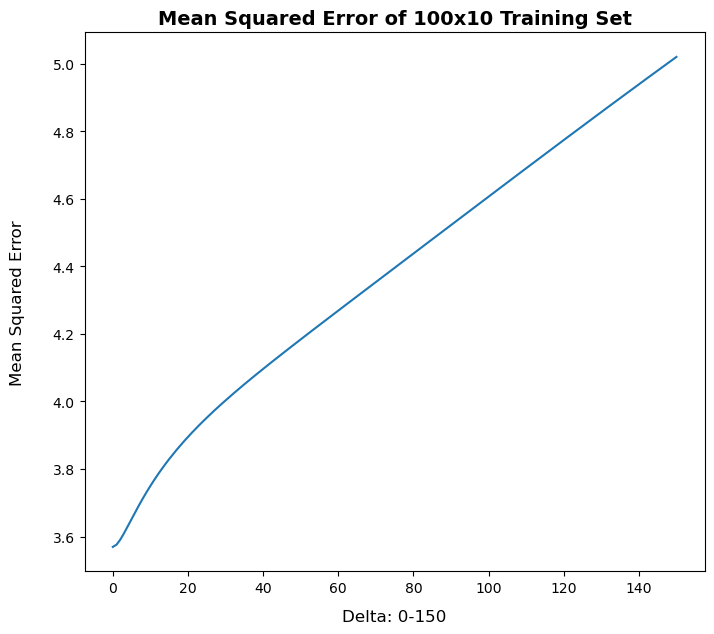

In [9]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 100x10 Training Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_100_10_df["Delta"], results_100_10_df["Train Mean Squared Errors"])
plt.show();

## Test 100x10 Dataset

#### (make sure to use weights from train set for the test data)

In [10]:
df_test_100_10 = pd.read_csv("test-100-10.csv")
df_test_100_10.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.895930,0.809690,0.87827,0.648120,0.47133,0.51050,0.40881,0.76693,0.21575,0.444950,5.98650
1,0.531930,0.078743,0.66625,0.388230,0.62899,0.53515,0.30681,0.89700,0.42708,0.020121,0.22522
2,0.028085,0.012064,0.85262,0.554250,0.21705,0.83138,0.12825,0.13270,0.94282,0.395840,2.18020
3,0.026921,0.377510,0.18617,0.047276,0.92279,0.63676,0.63542,0.15857,0.32636,0.178870,0.79505
4,0.122340,0.060263,0.38617,0.949250,0.65405,0.10899,0.41123,0.16765,0.70665,0.288850,2.40700


In [11]:
y_test_100x10_vector = df_test_100_10["y"]
df_test_100_10.drop(labels=["y"], axis = 1, inplace = True)
matrix_test_100_10 = df_test_100_10.to_numpy()

#Calculate mean squared error of Test Data using the w vector from the train data

mean_test_100_10_error_list = [mean_squared_error(matrix_test_100_10, y_test_100x10_vector, w) for w in w_train_100_10_list]

#Print out the test results in a new column of the previously created 100x10 dataframe

results_100_10_df["Test Mean Squared Errors"] = mean_test_100_10_error_list
results_100_10_df

,Delta,W,Train Mean Squared Errors,Test Mean Squared Errors
0,0,"[-0.3485613237651122, 1.4478638361874911, -0.1...",3.569430,4.399940
1,1,"[-0.22627863525669006, 1.360199729900923, -0.0...",3.576079,4.312622
2,2,"[-0.13554752634093165, 1.2866816786063457, -0....",3.591154,4.255286
3,3,"[-0.06582299500651101, 1.2242984352342776, 0.0...",3.610197,4.217189
4,4,"[-0.010769435529961013, 1.1707337680941845, 0....",3.630906,4.192016
...,...,...,...,...
146,146,"[0.27197194047477913, 0.39619847254454216, 0.3...",4.988097,5.882104
147,147,"[0.27141182320933266, 0.3949986197215508, 0.32...",4.996207,5.894041
148,148,"[0.2708529883708476, 0.39380747205964584, 0.32...",5.004307,5.905951
149,149,"[0.27029545552728534, 0.39262491273795697, 0.3...",5.012396,5.917836


In [12]:
results_100_10_df.head(20)

,Delta,W,Train Mean Squared Errors,Test Mean Squared Errors
0,0,"[-0.3485613237651122, 1.4478638361874911, -0.1...",3.569430,4.399940
1,1,"[-0.22627863525669006, 1.360199729900923, -0.0...",3.576079,4.312622
2,2,"[-0.13554752634093165, 1.2866816786063457, -0....",3.591154,4.255286
3,3,"[-0.06582299500651101, 1.2242984352342776, 0.0...",3.610197,4.217189
4,4,"[-0.010769435529961013, 1.1707337680941845, 0....",3.630906,4.192016
5,5,"[0.03364894558665535, 1.1242335206583896, 0.09...",3.652058,4.175839
6,6,"[0.07012310918878653, 1.0834637898809985, 0.12...",3.672998,4.166111
7,7,"[0.10051467072074718, 1.047399525897129, 0.148...",3.693381,4.161119
8,8,"[0.12615133655212463, 1.0152431803920603, 0.17...",3.713041,4.159679
9,9,"[0.14800464364359253, 0.9863663605186085, 0.18...",3.731909,4.160951


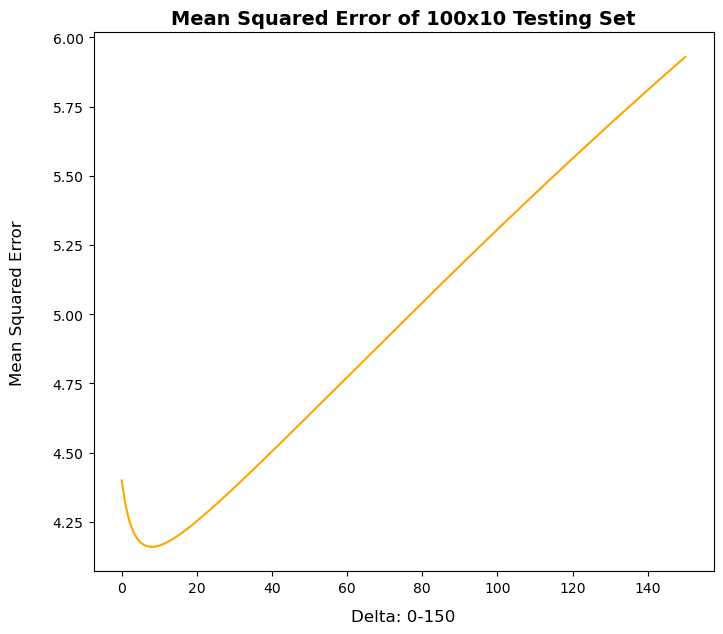

In [13]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 100x10 Testing Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_100_10_df["Delta"], results_100_10_df["Test Mean Squared Errors"], color = "orange")
plt.show();

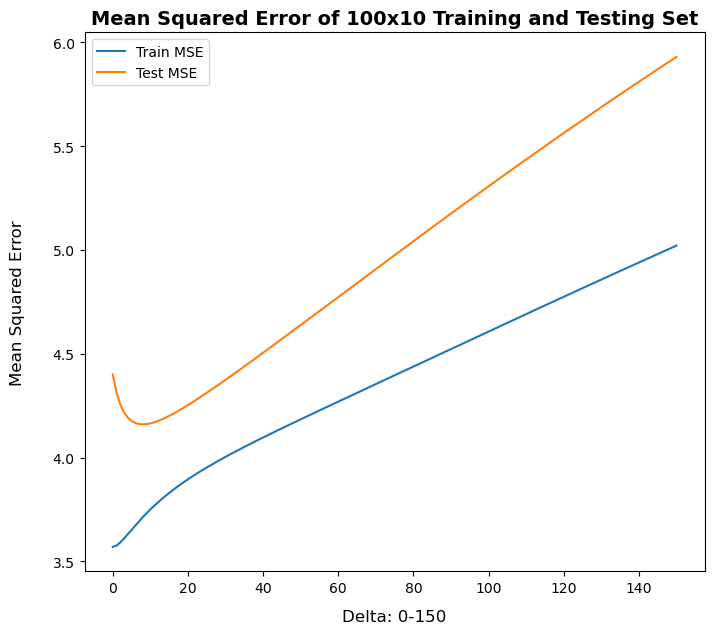

In [14]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 100x10 Training and Testing Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_100_10_df["Delta"], results_100_10_df["Train Mean Squared Errors"])
plt.plot(results_100_10_df["Delta"], results_100_10_df["Test Mean Squared Errors"])
plt.legend(["Train MSE", "Test MSE"])
plt.show();

## Train 100x100 Dataset

In [15]:
df_train_100_100 = pd.read_csv("train-100-100.csv")
df_train_100_100.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.28648,0.76797,0.86560,0.23025,0.38851,0.69154,0.947810,0.53947,0.38764,0.84426,...,0.36346,0.750080,0.28254,0.076441,0.36120,0.160420,0.828720,0.21281,0.93502,26.925
1,0.32532,0.83074,0.44977,0.56193,0.60565,0.15640,0.463910,0.76272,0.93479,0.58391,...,0.55296,0.111570,0.80561,0.423900,0.16726,0.083494,0.897500,0.70338,0.70717,26.527
2,0.93015,0.74205,0.79203,0.98151,0.96494,0.92387,0.076793,0.83263,0.43148,0.33622,...,0.66433,0.090614,0.74449,0.783500,0.25272,0.609980,0.709930,0.41356,0.42567,28.877
3,0.50167,0.25560,0.33835,0.76387,0.93655,0.16139,0.264210,0.92283,0.59483,0.44579,...,0.36468,0.839290,0.49188,0.760140,0.96061,0.591080,0.994780,0.13714,0.80464,22.313
4,0.21729,0.69956,0.27804,0.52115,0.89397,0.12505,0.539180,0.97857,0.30461,0.97232,...,0.37876,0.207110,0.14568,0.940170,0.58554,0.296990,0.039614,0.75011,0.60004,21.513


In [16]:
y_train_100_100_vector = df_train_100_100["y"]
df_train_100_100.drop(labels=["y"], axis = 1, inplace = True)
matrix_train_100_100 = df_train_100_100.to_numpy()
w_train_100_100_list = [weight_w(matrix_train_100_100, y_train_100_100_vector, delta) for delta in delta_list]
mean_train_100_100_error_list = [mean_squared_error(matrix_train_100_100, y_train_100_100_vector, w) for w in w_train_100_100_list]
results_100_100_df = pd.DataFrame({"Delta": delta_list, "W": w_train_100_100_list, "Train Mean Squared Errors": mean_train_100_100_error_list})
results_100_100_df


,Delta,W,Train Mean Squared Errors
0,0,"[-0.28602231683268187, 9.128774889446994, 5.84...",1.169601e-20
1,1,"[-0.1421052250839412, 1.3562987600453562, -0.0...",4.925557e-01
2,2,"[-0.13506607658689562, 1.109361270103226, -0.0...",7.688122e-01
3,3,"[-0.10308531089618667, 0.9858644245691361, 0.0...",9.935657e-01
4,4,"[-0.0683451448655994, 0.9088108064724518, 0.02...",1.183759e+00
...,...,...,...
146,146,"[0.3557061672064058, 0.483431698291804, 0.4351...",5.501402e+00
147,147,"[0.3558401089626567, 0.4830720022428041, 0.435...",5.524992e+00
148,148,"[0.35597062362396326, 0.4827147839612144, 0.43...",5.548675e+00
149,149,"[0.35609777697765643, 0.4823599998152261, 0.43...",5.572448e+00


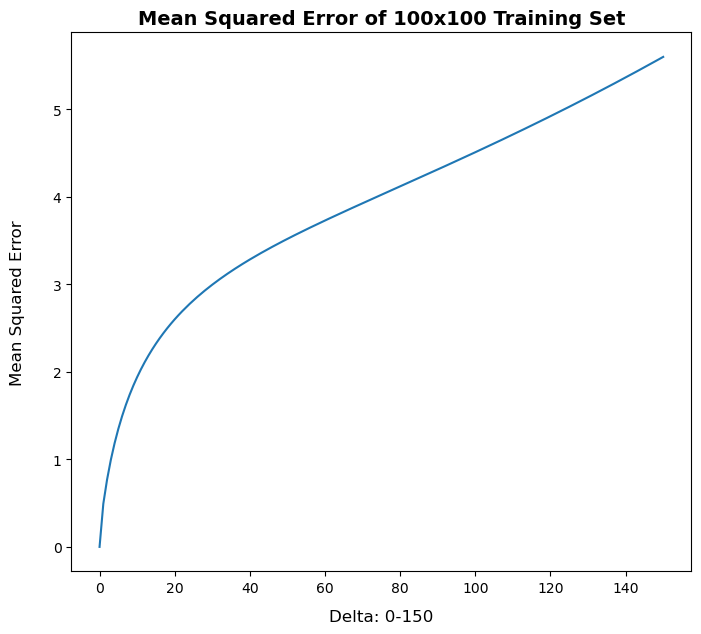

In [17]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 100x100 Training Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_100_100_df["Delta"], results_100_100_df["Train Mean Squared Errors"])
plt.show();

## Test 100x100 Dataset

In [18]:
df_test_100_100 = pd.read_csv("test-100-100.csv")
df_test_100_100.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.444950,0.60720,0.57433,0.766260,0.67568,0.97218,0.352910,0.79898,0.64758,0.29219,...,0.17722,0.69355,0.82177,0.23876,0.790200,0.098811,0.54789,0.26295,0.95013,29.423
1,0.020121,0.93975,0.27973,0.249330,0.84403,0.72708,0.065012,0.64436,0.87213,0.33806,...,0.30550,0.69605,0.20660,0.25072,0.956940,0.815850,0.58886,0.15286,0.59821,22.845
2,0.395840,0.57725,0.20836,0.411520,0.20229,0.60395,0.697940,0.34000,0.91778,0.74534,...,0.40142,0.13810,0.70410,0.83391,0.524190,0.912030,0.23952,0.77471,0.66427,27.517
3,0.178870,0.13230,0.77882,0.012237,0.49196,0.89450,0.372190,0.32707,0.79901,0.43528,...,0.69945,0.83124,0.95919,0.88284,0.733670,0.628040,0.31619,0.89768,0.66788,24.049
4,0.288850,0.16514,0.13789,0.605990,0.71356,0.37940,0.131340,0.83452,0.95816,0.79540,...,0.93174,0.51921,0.57729,0.48120,0.078314,0.475010,0.13482,0.74317,0.82156,22.336


In [19]:
y_test_100_100_vector = df_test_100_100["y"]
df_test_100_100.drop(labels=["y"], axis = 1, inplace = True)
matrix_test_100_100 = df_test_100_100.to_numpy()
mean_test_100_100_error_list = [mean_squared_error(matrix_test_100_100, y_test_100_100_vector, w) for w in w_train_100_100_list]
results_100_100_df["Test Mean Squared Errors"] = mean_test_100_100_error_list
results_100_100_df


,Delta,W,Train Mean Squared Errors,Test Mean Squared Errors
0,0,"[-0.28602231683268187, 9.128774889446994, 5.84...",1.169601e-20,259.599781
1,1,"[-0.1421052250839412, 1.3562987600453562, -0.0...",4.925557e-01,9.497716
2,2,"[-0.13506607658689562, 1.109361270103226, -0.0...",7.688122e-01,7.682158
3,3,"[-0.10308531089618667, 0.9858644245691361, 0.0...",9.935657e-01,6.834393
4,4,"[-0.0683451448655994, 0.9088108064724518, 0.02...",1.183759e+00,6.336690
...,...,...,...,...
146,146,"[0.3557061672064058, 0.483431698291804, 0.4351...",5.501402e+00,7.745985
147,147,"[0.3558401089626567, 0.4830720022428041, 0.435...",5.524992e+00,7.776618
148,148,"[0.35597062362396326, 0.4827147839612144, 0.43...",5.548675e+00,7.807364
149,149,"[0.35609777697765643, 0.4823599998152261, 0.43...",5.572448e+00,7.838223


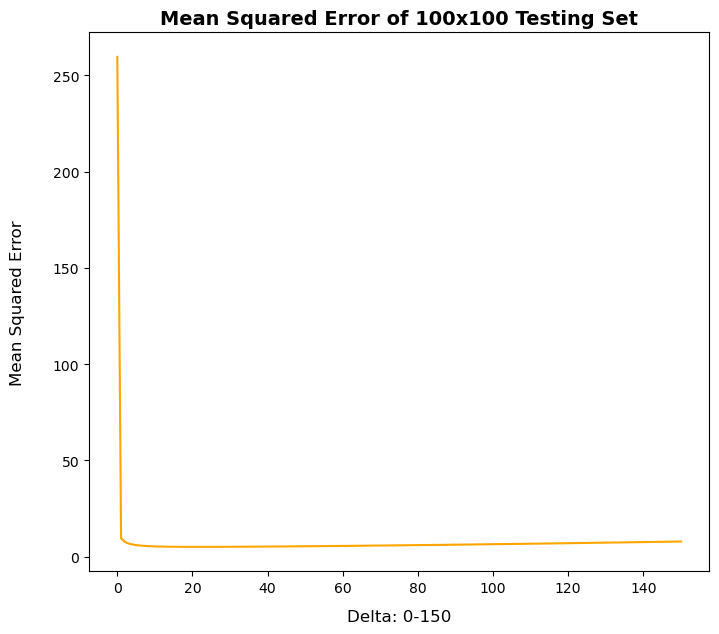

In [20]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 100x100 Testing Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_100_100_df["Delta"], results_100_100_df["Test Mean Squared Errors"], color = "orange")
plt.show();

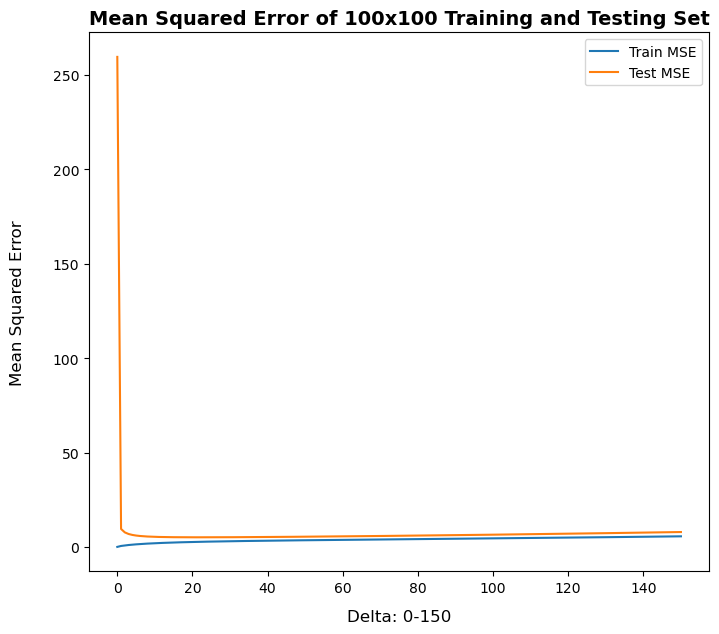

In [21]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 100x100 Training and Testing Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_100_100_df["Delta"], results_100_100_df["Train Mean Squared Errors"])
plt.plot(results_100_100_df["Delta"], results_100_100_df["Test Mean Squared Errors"])
plt.legend(["Train MSE", "Test MSE"])
plt.show();

## Train 1000x100 Dataset

In [22]:
df_train_1000_100 = pd.read_csv("train-1000-100.csv")
df_train_1000_100

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.286480,0.895930,0.809690,0.878270,0.648120,0.47133,0.510500,0.40881,0.76693,0.215750,...,0.947740,0.997140,0.26502,0.977770,0.631900,0.89770,0.396860,0.53171,0.93642,27.470
1,0.325320,0.531930,0.078743,0.666250,0.388230,0.62899,0.535150,0.30681,0.89700,0.427080,...,0.333700,0.231200,0.91655,0.169280,0.874640,0.90954,0.632940,0.12104,0.39628,21.392
2,0.930150,0.028085,0.012064,0.852620,0.554250,0.21705,0.831380,0.12825,0.13270,0.942820,...,0.220520,0.805070,0.51514,0.239260,0.075147,0.93928,0.149210,0.92512,0.62387,27.409
3,0.501670,0.026921,0.377510,0.186170,0.047276,0.92279,0.636760,0.63542,0.15857,0.326360,...,0.327860,0.209870,0.36781,0.231820,0.169180,0.60293,0.039099,0.53155,0.69605,20.025
4,0.217290,0.122340,0.060263,0.386170,0.949250,0.65405,0.108990,0.41123,0.16765,0.706650,...,0.573280,0.095252,0.43198,0.078685,0.439650,0.21455,0.859820,0.83851,0.78669,20.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.550240,0.872890,0.273160,0.499770,0.200270,0.73170,0.055906,0.81000,0.34409,0.196420,...,0.811770,0.526390,0.54700,0.748450,0.680120,0.13586,0.929700,0.16354,0.32944,25.803
996,0.099221,0.667040,0.236400,0.016702,0.650340,0.60231,0.908500,0.22106,0.40892,0.057065,...,0.062483,0.685440,0.73598,0.200370,0.552020,0.79863,0.908610,0.74852,0.90341,21.972
997,0.122720,0.911130,0.530760,0.003105,0.194430,0.96663,0.870740,0.87575,0.45318,0.395950,...,0.177110,0.031243,0.50336,0.012944,0.884420,0.98016,0.099528,0.29062,0.51185,22.010
998,0.411920,0.229520,0.844050,0.397720,0.987930,0.98062,0.186250,0.89078,0.48235,0.168690,...,0.979630,0.217500,0.90384,0.433560,0.776000,0.63408,0.099629,0.80582,0.10629,24.726


In [23]:
y_train_1000_100_vector = df_train_1000_100["y"]
df_train_1000_100.drop(labels=["y"], axis = 1, inplace = True)
matrix_train_1000_100 = df_train_1000_100.to_numpy()

#Get the weights vector for each corresponding delta (1-150)
w_train_1000_100_list = [weight_w(matrix_train_1000_100, y_train_1000_100_vector, delta) for delta in delta_list]

#Use each weights vector to get a corresponding mean squared error
mean_train_1000_100_error_list = [mean_squared_error(matrix_train_1000_100, y_train_1000_100_vector, w) for w in w_train_1000_100_list]

#Print the 1000x100 datasets results in a Dataframe
results_1000_100_df = pd.DataFrame({"Delta": delta_list, "W": w_train_1000_100_list, "Train Mean Squared Errors": mean_train_1000_100_error_list})
results_1000_100_df

,Delta,W,Train Mean Squared Errors
0,0,"[0.5322418005151786, 0.6576487245194662, 0.415...",3.434941
1,1,"[0.5311570222448787, 0.653208981270414, 0.4177...",3.435135
2,2,"[0.530105446517652, 0.648949436744882, 0.41975...",3.435695
3,3,"[0.5290852485809936, 0.6448595442572064, 0.421...",3.436591
4,4,"[0.5280947528308506, 0.6409295689558158, 0.423...",3.437795
...,...,...,...
146,146,"[0.47781840353754923, 0.5004676515385658, 0.46...",3.938380
147,147,"[0.4776752912448081, 0.5002279161976123, 0.463...",3.940991
148,148,"[0.47753324357718097, 0.4999907380811033, 0.46...",3.943589
149,149,"[0.4773922468964067, 0.49975607537011574, 0.46...",3.946174


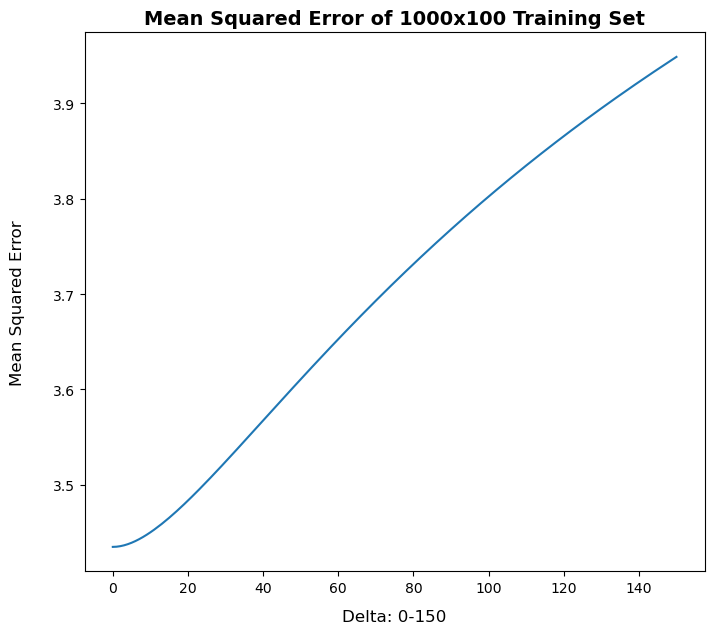

In [24]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 1000x100 Training Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_1000_100_df["Delta"], results_1000_100_df["Train Mean Squared Errors"])
plt.show();

## Test 1000x100 Dataset

In [25]:
df_test_1000_100 = pd.read_csv("test-1000-100.csv")
df_test_1000_100.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.898770,0.17722,0.69355,0.82177,0.23876,0.790200,0.098811,0.54789,0.26295,0.95013,...,0.18333,0.80778,0.068098,0.129060,0.630440,0.088467,0.47025,0.89215,0.66756,23.947
1,0.074328,0.30550,0.69605,0.20660,0.25072,0.956940,0.815850,0.58886,0.15286,0.59821,...,0.70469,0.19336,0.324090,0.138320,0.797420,0.550790,0.43836,0.42800,0.56431,25.611
2,0.585380,0.40142,0.13810,0.70410,0.83391,0.524190,0.912030,0.23952,0.77471,0.66427,...,0.17394,0.89343,0.281830,0.004006,0.652160,0.822200,0.70624,0.51056,0.82463,21.594
3,0.905910,0.69945,0.83124,0.95919,0.88284,0.733670,0.628040,0.31619,0.89768,0.66788,...,0.86383,0.81470,0.416120,0.075836,0.799460,0.484190,0.90158,0.73307,0.44103,23.545
4,0.566760,0.93174,0.51921,0.57729,0.48120,0.078314,0.475010,0.13482,0.74317,0.82156,...,0.11862,0.92778,0.108250,0.646850,0.045713,0.957060,0.60895,0.13765,0.23533,21.447


In [26]:
y_test_1000_100_vector = df_test_1000_100["y"]
df_test_1000_100.drop(labels=["y"], axis = 1, inplace = True)
matrix_test_1000_100 = df_test_1000_100.to_numpy()

#Use each "training" set weights vector to get a corresponding Test mean squared error
mean_test_1000_100_error_list = [mean_squared_error(matrix_test_1000_100, y_test_1000_100_vector, w) for w in w_train_1000_100_list]

#Print the 1000x100 test dataset results in the 1000x100 datasets Dataframe
results_1000_100_df["Test Mean Squared Errors"] = mean_test_1000_100_error_list
results_1000_100_df

,Delta,W,Train Mean Squared Errors,Test Mean Squared Errors
0,0,"[0.5322418005151786, 0.6576487245194662, 0.415...",3.434941,4.396314
1,1,"[0.5311570222448787, 0.653208981270414, 0.4177...",3.435135,4.388196
2,2,"[0.530105446517652, 0.648949436744882, 0.41975...",3.435695,4.380731
3,3,"[0.5290852485809936, 0.6448595442572064, 0.421...",3.436591,4.373871
4,4,"[0.5280947528308506, 0.6409295689558158, 0.423...",3.437795,4.367572
...,...,...,...,...
146,146,"[0.47781840353754923, 0.5004676515385658, 0.46...",3.938380,4.499646
147,147,"[0.4776752912448081, 0.5002279161976123, 0.463...",3.940991,4.501149
148,148,"[0.47753324357718097, 0.4999907380811033, 0.46...",3.943589,4.502647
149,149,"[0.4773922468964067, 0.49975607537011574, 0.46...",3.946174,4.504138


In [27]:
results_1000_100_df.iloc[16:35][["Delta", "Test Mean Squared Errors"]]

,Delta,Test Mean Squared Errors
16,16,4.324070
17,17,4.322392
18,18,4.320929
19,19,4.319670
20,20,4.318601
21,21,4.317711
22,22,4.316989
23,23,4.316425
24,24,4.316010
25,25,4.315735


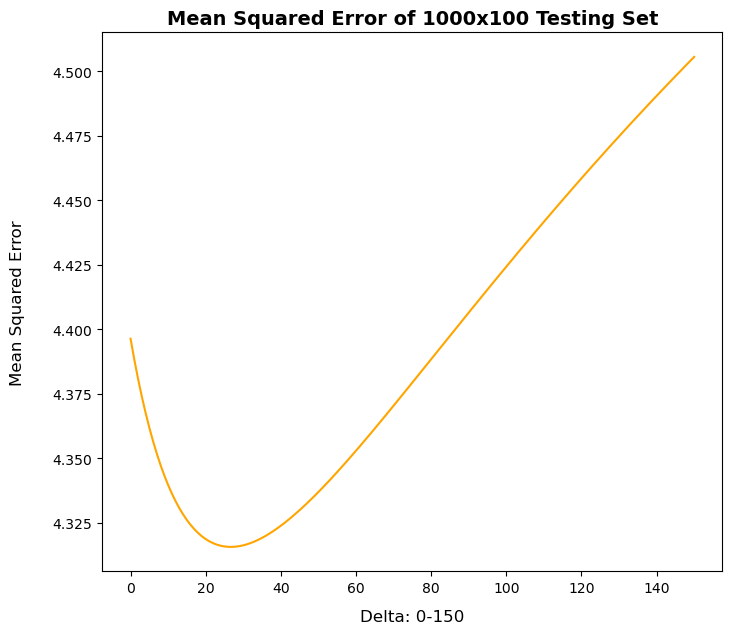

In [28]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 1000x100 Testing Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_1000_100_df["Delta"], results_1000_100_df["Test Mean Squared Errors"], color = "orange")
plt.show();

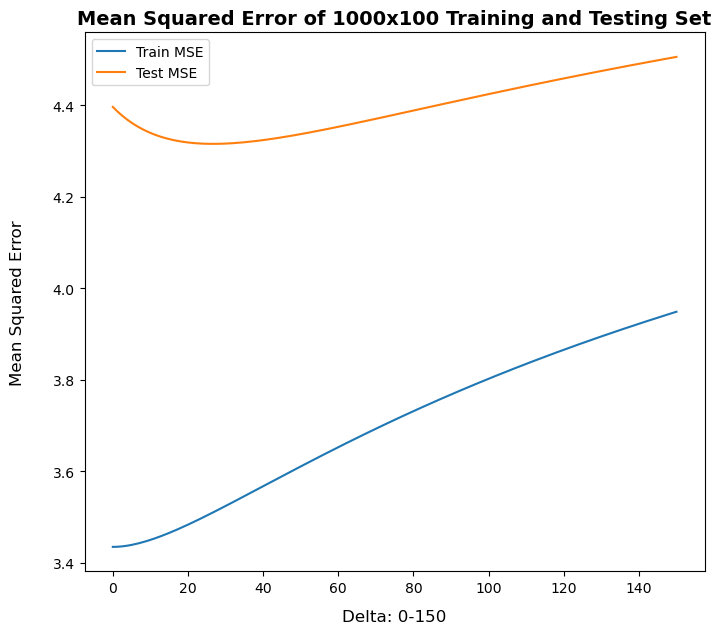

In [29]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 1000x100 Training and Testing Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_1000_100_df["Delta"], results_1000_100_df["Train Mean Squared Errors"])
plt.plot(results_1000_100_df["Delta"], results_1000_100_df["Test Mean Squared Errors"])
plt.legend(["Train MSE", "Test MSE"])
plt.show();

## Question (2a):

### For the 100x10 datasets, the smallest test set MSE occurs at delta = 8

In [30]:
index_min_test_error = results_100_10_df["Test Mean Squared Errors"].idxmin() 
small_mse_100x10 = results_100_10_df.iloc[[index_min_test_error]][["Delta", "Test Mean Squared Errors"]]
small_mse_100x10

,Delta,Test Mean Squared Errors
8,8,4.159679


### For the 100x100 datasets, the smallest test set MSE occurs at delta = 22

In [31]:
index_min_test_error = results_100_100_df["Test Mean Squared Errors"].idxmin() 
small_mse_100x100 = results_100_100_df.iloc[[index_min_test_error]][["Delta", "Test Mean Squared Errors"]]
small_mse_100x100

,Delta,Test Mean Squared Errors
22,22,5.0783


### For the 1000x100 datasets, the smallest test set MSE occurs at delta = 27

In [32]:
index_min_test_error = results_1000_100_df["Test Mean Squared Errors"].idxmin() 
small_mse_1000x100 = results_1000_100_df.iloc[[index_min_test_error]][["Delta", "Test Mean Squared Errors"]]
small_mse_1000x100

,Delta,Test Mean Squared Errors
27,27,4.315571


## Plots for Question 2b:

### Train (50) 1000-100 train dataset

In [33]:
df_train_50_1000x100 = pd.read_csv("train-50(1000)-100.csv")
df_train_50_1000x100.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.28648,0.895930,0.809690,0.87827,0.648120,0.47133,0.51050,0.40881,0.76693,0.21575,...,0.94774,0.997140,0.26502,0.977770,0.631900,0.89770,0.396860,0.53171,0.93642,27.470
1,0.32532,0.531930,0.078743,0.66625,0.388230,0.62899,0.53515,0.30681,0.89700,0.42708,...,0.33370,0.231200,0.91655,0.169280,0.874640,0.90954,0.632940,0.12104,0.39628,21.392
2,0.93015,0.028085,0.012064,0.85262,0.554250,0.21705,0.83138,0.12825,0.13270,0.94282,...,0.22052,0.805070,0.51514,0.239260,0.075147,0.93928,0.149210,0.92512,0.62387,27.409
3,0.50167,0.026921,0.377510,0.18617,0.047276,0.92279,0.63676,0.63542,0.15857,0.32636,...,0.32786,0.209870,0.36781,0.231820,0.169180,0.60293,0.039099,0.53155,0.69605,20.025
4,0.21729,0.122340,0.060263,0.38617,0.949250,0.65405,0.10899,0.41123,0.16765,0.70665,...,0.57328,0.095252,0.43198,0.078685,0.439650,0.21455,0.859820,0.83851,0.78669,20.045


In [34]:
y_train_50_1000x100_vector = df_train_50_1000x100["y"]
df_train_50_1000x100.drop(labels=["y"], axis = 1, inplace = True)
matrix_train_50_1000x100 = df_train_50_1000x100.to_numpy()

#Get the weights vector for each corresponding delta (1-150)
w_train_50_1000x100_list = [weight_w(matrix_train_50_1000x100, y_train_50_1000x100_vector, delta) for delta in delta_list]

#Use each "training" set weights vector to get a corresponding mean squared error
mean_train_50_1000x100_error_list = [mean_squared_error(matrix_train_50_1000x100, y_train_50_1000x100_vector, w) 
                                     for w in w_train_50_1000x100_list]

#Print the 50_1000x100 datasets results in a Dataframe
results_50_1000x100_df = pd.DataFrame({"Delta": delta_list, "W": w_train_50_1000x100_list, 
                                       "Train Mean Squared Errors": mean_train_50_1000x100_error_list})
results_50_1000x100_df


,Delta,W,Train Mean Squared Errors
0,0,"[64.18648686953628, -1066.0672354591188, -323....",185974.774919
1,1,"[0.15100789890991212, 0.9930411326573008, 0.48...",0.384725
2,2,"[0.2606902798702218, 0.8869597656251207, 0.493...",0.749910
3,3,"[0.3101588950890051, 0.8209159447606491, 0.498...",1.024643
4,4,"[0.337728217656228, 0.7746549993483263, 0.5013...",1.243607
...,...,...,...
146,146,"[0.3618926001784354, 0.40642568878650753, 0.39...",9.227023
147,147,"[0.361627239255779, 0.4059830224948451, 0.3982...",9.293673
148,148,"[0.3613623806913172, 0.4055429611872614, 0.397...",9.360597
149,149,"[0.36109802147349174, 0.40510546227146593, 0.3...",9.427795


In [35]:
#Use the "training" set weights vector from the 50_(1000)x100 training set to get a corresponding Test mean squared error
mean_test_1000_100_error_list = [mean_squared_error(matrix_test_1000_100, y_test_1000_100_vector, w)
                                 for w in w_train_50_1000x100_list]

#Print the 1000x100 test dataset results in the 50_(1000)x100 results Dataframe
results_50_1000x100_df["Test Mean Squared Errors"] = mean_test_1000_100_error_list
results_50_1000x100_df

,Delta,W,Train Mean Squared Errors,Test Mean Squared Errors
0,0,"[64.18648686953628, -1066.0672354591188, -323....",185974.774919,4.778175e+06
1,1,"[0.15100789890991212, 0.9930411326573008, 0.48...",0.384725,6.818661e+00
2,2,"[0.2606902798702218, 0.8869597656251207, 0.493...",0.749910,6.057223e+00
3,3,"[0.3101588950890051, 0.8209159447606491, 0.498...",1.024643,5.779520e+00
4,4,"[0.337728217656228, 0.7746549993483263, 0.5013...",1.243607,5.651858e+00
...,...,...,...,...
146,146,"[0.3618926001784354, 0.40642568878650753, 0.39...",9.227023,1.311327e+01
147,147,"[0.361627239255779, 0.4059830224948451, 0.3982...",9.293673,1.319255e+01
148,148,"[0.3613623806913172, 0.4055429611872614, 0.397...",9.360597,1.327210e+01
149,149,"[0.36109802147349174, 0.40510546227146593, 0.3...",9.427795,1.335192e+01


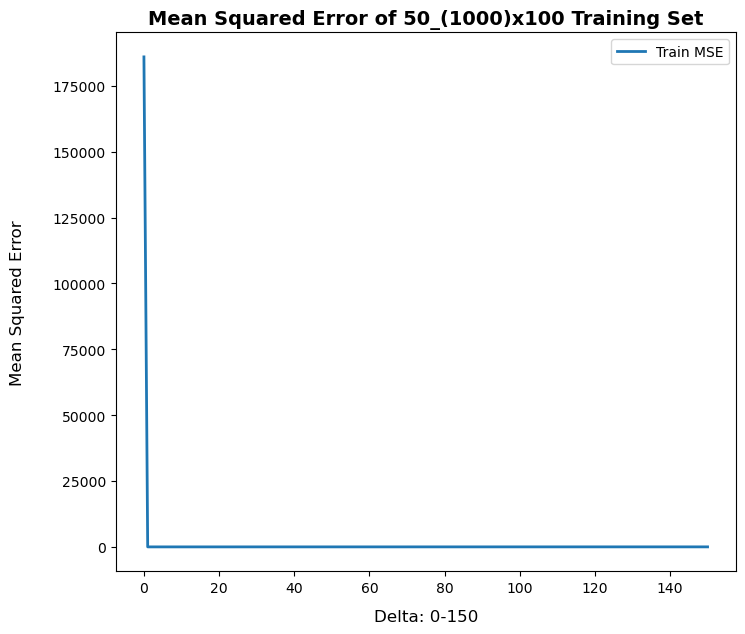

In [36]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 50_(1000)x100 Training Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_50_1000x100_df["Delta"], results_50_1000x100_df["Train Mean Squared Errors"], lw = 2)
plt.legend(["Train MSE"])
plt.show();

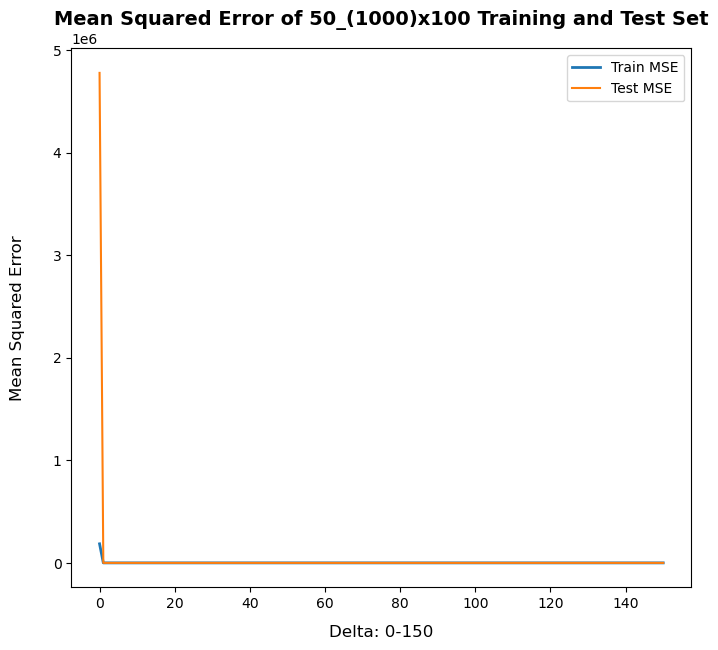

In [37]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 50_(1000)x100 Training and Test Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_50_1000x100_df["Delta"], results_50_1000x100_df["Train Mean Squared Errors"], lw = 2)
plt.plot(results_50_1000x100_df["Delta"], results_50_1000x100_df["Test Mean Squared Errors"])
plt.legend(["Train MSE", "Test MSE"])
plt.show();

### Train (100) 1000-100 train dataset

In [38]:
df_train_100_1000x100 = pd.read_csv("train-100(1000)-100.csv")
df_train_100_1000x100.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.28648,0.895930,0.809690,0.87827,0.648120,0.47133,0.51050,0.40881,0.76693,0.21575,...,0.94774,0.997140,0.26502,0.977770,0.631900,0.89770,0.396860,0.53171,0.93642,27.470
1,0.32532,0.531930,0.078743,0.66625,0.388230,0.62899,0.53515,0.30681,0.89700,0.42708,...,0.33370,0.231200,0.91655,0.169280,0.874640,0.90954,0.632940,0.12104,0.39628,21.392
2,0.93015,0.028085,0.012064,0.85262,0.554250,0.21705,0.83138,0.12825,0.13270,0.94282,...,0.22052,0.805070,0.51514,0.239260,0.075147,0.93928,0.149210,0.92512,0.62387,27.409
3,0.50167,0.026921,0.377510,0.18617,0.047276,0.92279,0.63676,0.63542,0.15857,0.32636,...,0.32786,0.209870,0.36781,0.231820,0.169180,0.60293,0.039099,0.53155,0.69605,20.025
4,0.21729,0.122340,0.060263,0.38617,0.949250,0.65405,0.10899,0.41123,0.16765,0.70665,...,0.57328,0.095252,0.43198,0.078685,0.439650,0.21455,0.859820,0.83851,0.78669,20.045


In [39]:
y_train_100_1000x100_vector = df_train_100_1000x100["y"]
df_train_100_1000x100.drop(labels=["y"], axis = 1, inplace = True)
matrix_train_100_1000x100 = df_train_100_1000x100.to_numpy()

#Get the weights vector for each corresponding delta (1-150)
w_train_100_1000x100_list = [weight_w(matrix_train_100_1000x100, y_train_100_1000x100_vector, delta) for delta in delta_list]

#Use each "training" set weights vector to get a corresponding mean squared error
mean_train_100_1000x100_error_list = [mean_squared_error(matrix_train_100_1000x100, y_train_100_1000x100_vector, w) 
                                     for w in w_train_100_1000x100_list]

#Print the 100_1000x100 datasets results in a Dataframe
results_100_1000x100_df = pd.DataFrame({"Delta": delta_list, "W": w_train_100_1000x100_list, 
                                       "Train Mean Squared Errors": mean_train_100_1000x100_error_list})
results_100_1000x100_df

,Delta,W,Train Mean Squared Errors
0,0,"[-11.516368960847867, -5.4071262260917194, 1.1...",9.556963e-21
1,1,"[-0.4873223532701898, 0.9429032497230896, 0.46...",9.152709e-01
2,2,"[-0.22986065486037965, 0.8651809057174877, 0.4...",1.220524e+00
3,3,"[-0.10692541973215963, 0.8141823605383829, 0.5...",1.427831e+00
4,4,"[-0.03005447361812985, 0.7775599409472034, 0.5...",1.593575e+00
...,...,...,...
146,146,"[0.36610433949907295, 0.45195638324412524, 0.4...",5.566292e+00
147,147,"[0.3661075633877767, 0.45161621468085344, 0.40...",5.588273e+00
148,148,"[0.3661089297776585, 0.4512784180841155, 0.404...",5.610339e+00
149,149,"[0.36610847718373685, 0.4509429514713108, 0.40...",5.632488e+00


In [40]:
#Use the "training" set weights vector from the 100_(1000)x100 training set to get a corresponding Test mean squared error
mean_test_1000_100_error_list = [mean_squared_error(matrix_test_1000_100, y_test_1000_100_vector, w)
                                 for w in w_train_100_1000x100_list]

#Print the 1000x100 test dataset results in the 100_(1000)x100 results Dataframe
results_100_1000x100_df["Test Mean Squared Errors"] = mean_test_1000_100_error_list
results_100_1000x100_df

,Delta,W,Train Mean Squared Errors,Test Mean Squared Errors
0,0,"[-11.516368960847867, -5.4071262260917194, 1.1...",9.556963e-21,337.268316
1,1,"[-0.4873223532701898, 0.9429032497230896, 0.46...",9.152709e-01,7.864465
2,2,"[-0.22986065486037965, 0.8651809057174877, 0.4...",1.220524e+00,6.552393
3,3,"[-0.10692541973215963, 0.8141823605383829, 0.5...",1.427831e+00,6.075801
4,4,"[-0.03005447361812985, 0.7775599409472034, 0.5...",1.593575e+00,5.816752
...,...,...,...,...
146,146,"[0.36610433949907295, 0.45195638324412524, 0.4...",5.566292e+00,7.321428
147,147,"[0.3661075633877767, 0.45161621468085344, 0.40...",5.588273e+00,7.346128
148,148,"[0.3661089297776585, 0.4512784180841155, 0.404...",5.610339e+00,7.370933
149,149,"[0.36610847718373685, 0.4509429514713108, 0.40...",5.632488e+00,7.395844


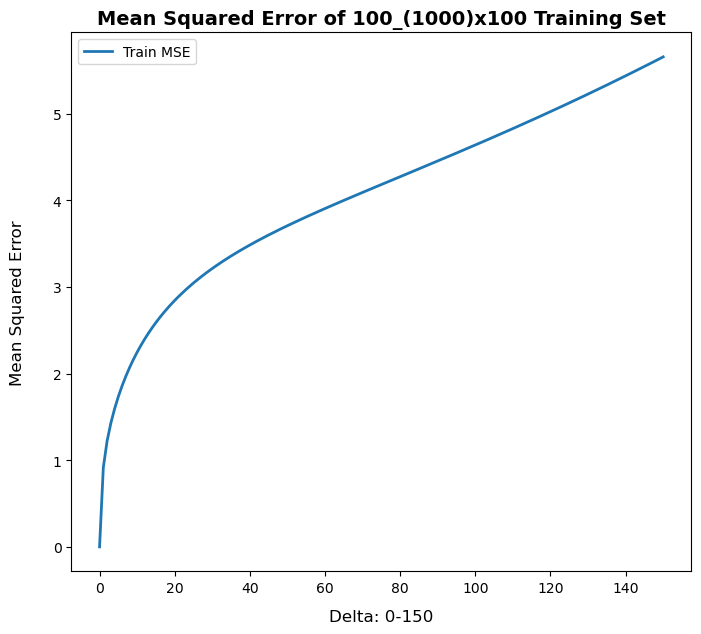

In [41]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 100_(1000)x100 Training Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_100_1000x100_df["Delta"], results_100_1000x100_df["Train Mean Squared Errors"], lw = 2)
plt.legend(["Train MSE"])
plt.show();

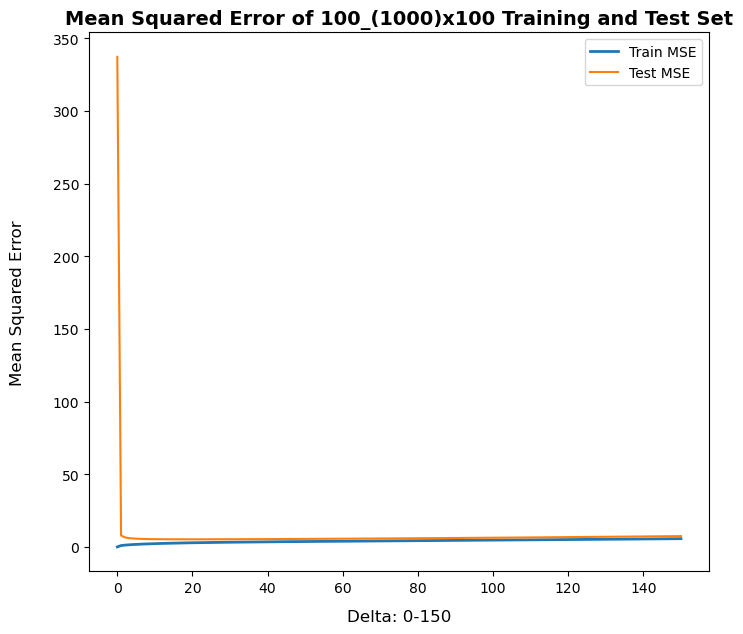

In [42]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 100_(1000)x100 Training and Test Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_100_1000x100_df["Delta"], results_100_1000x100_df["Train Mean Squared Errors"], lw = 2)
plt.plot(results_100_1000x100_df["Delta"], results_100_1000x100_df["Test Mean Squared Errors"])
plt.legend(["Train MSE", "Test MSE"])
plt.show();

### Train (150) 1000-100 train dataset

In [43]:
df_train_150_1000x100 = pd.read_csv("train-150(1000)-100.csv")
df_train_150_1000x100.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x92,x93,x94,x95,x96,x97,x98,x99,x100,y
0,0.28648,0.895930,0.809690,0.87827,0.648120,0.47133,0.51050,0.40881,0.76693,0.21575,...,0.94774,0.997140,0.26502,0.977770,0.631900,0.89770,0.396860,0.53171,0.93642,27.470
1,0.32532,0.531930,0.078743,0.66625,0.388230,0.62899,0.53515,0.30681,0.89700,0.42708,...,0.33370,0.231200,0.91655,0.169280,0.874640,0.90954,0.632940,0.12104,0.39628,21.392
2,0.93015,0.028085,0.012064,0.85262,0.554250,0.21705,0.83138,0.12825,0.13270,0.94282,...,0.22052,0.805070,0.51514,0.239260,0.075147,0.93928,0.149210,0.92512,0.62387,27.409
3,0.50167,0.026921,0.377510,0.18617,0.047276,0.92279,0.63676,0.63542,0.15857,0.32636,...,0.32786,0.209870,0.36781,0.231820,0.169180,0.60293,0.039099,0.53155,0.69605,20.025
4,0.21729,0.122340,0.060263,0.38617,0.949250,0.65405,0.10899,0.41123,0.16765,0.70665,...,0.57328,0.095252,0.43198,0.078685,0.439650,0.21455,0.859820,0.83851,0.78669,20.045


In [44]:
y_train_150_1000x100_vector = df_train_150_1000x100["y"]
df_train_150_1000x100.drop(labels=["y"], axis = 1, inplace = True)
matrix_train_150_1000x100 = df_train_150_1000x100.to_numpy()

#Get the weights vector for each corresponding delta (1-150)
w_train_150_1000x100_list = [weight_w(matrix_train_150_1000x100, y_train_150_1000x100_vector, delta) for delta in delta_list]

#Use each "training" set weights vector to get a corresponding mean squared error
mean_train_150_1000x100_error_list = [mean_squared_error(matrix_train_150_1000x100, y_train_150_1000x100_vector, w) 
                                     for w in w_train_150_1000x100_list]

#Print the 50_1000x100 datasets results in a Dataframe
results_150_1000x100_df = pd.DataFrame({"Delta": delta_list, "W": w_train_150_1000x100_list, 
                                       "Train Mean Squared Errors": mean_train_150_1000x100_error_list})
results_150_1000x100_df

,Delta,W,Train Mean Squared Errors
0,0,"[0.1976546952074063, 0.04150012464544561, 0.61...",1.598832
1,1,"[0.5363721314262668, 0.3146246564393542, 0.585...",1.745708
2,2,"[0.555712264227378, 0.41399776276783884, 0.576...",1.901750
3,3,"[0.5475221211552104, 0.46162747026315554, 0.57...",2.031846
4,4,"[0.5365551529575046, 0.4867573067210458, 0.566...",2.143219
...,...,...,...
146,146,"[0.42414782180289123, 0.44626433184055075, 0.4...",4.807843
147,147,"[0.42397216204534505, 0.44608654613514315, 0.4...",4.819410
148,148,"[0.4237973570710667, 0.44590963593744226, 0.44...",4.831009
149,149,"[0.4236233932405902, 0.44573358614833836, 0.44...",4.842639


In [45]:
#Use the "training" set weights vector from the 150_(1000)x100 training set to get a corresponding Test mean squared error
mean_test_1000_100_error_list = [mean_squared_error(matrix_test_1000_100, y_test_1000_100_vector, w)
                                 for w in w_train_150_1000x100_list]

#Print the 1000x100 test dataset results in the 150_(1000)x100 results Dataframe
results_150_1000x100_df["Test Mean Squared Errors"] = mean_test_1000_100_error_list
results_150_1000x100_df

,Delta,W,Train Mean Squared Errors,Test Mean Squared Errors
0,0,"[0.1976546952074063, 0.04150012464544561, 0.61...",1.598832,12.383181
1,1,"[0.5363721314262668, 0.3146246564393542, 0.585...",1.745708,7.585762
2,2,"[0.555712264227378, 0.41399776276783884, 0.576...",1.901750,6.429450
3,3,"[0.5475221211552104, 0.46162747026315554, 0.57...",2.031846,5.901953
4,4,"[0.5365551529575046, 0.4867573067210458, 0.566...",2.143219,5.600056
...,...,...,...,...
146,146,"[0.42414782180289123, 0.44626433184055075, 0.4...",4.807843,5.768510
147,147,"[0.42397216204534505, 0.44608654613514315, 0.4...",4.819410,5.779412
148,148,"[0.4237973570710667, 0.44590963593744226, 0.44...",4.831009,5.790365
149,149,"[0.4236233932405902, 0.44573358614833836, 0.44...",4.842639,5.801368


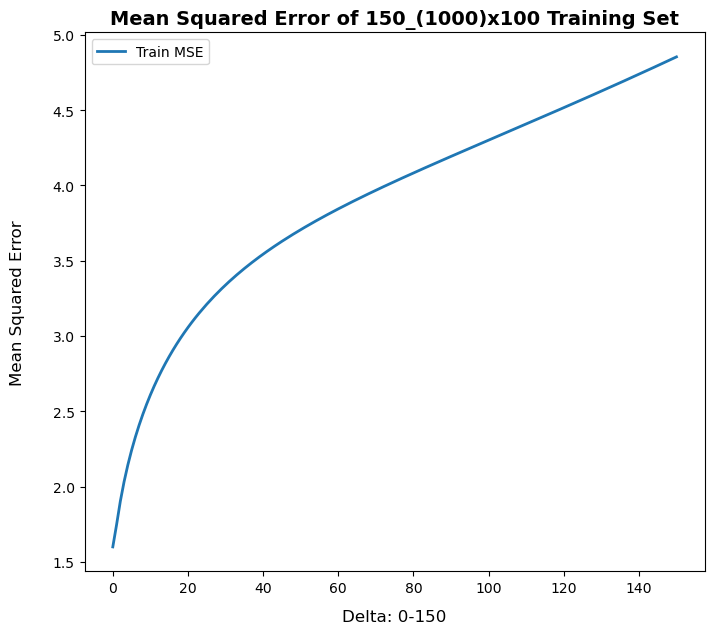

In [46]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 150_(1000)x100 Training Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_150_1000x100_df["Delta"], results_150_1000x100_df["Train Mean Squared Errors"], lw = 2)
plt.legend(["Train MSE"])
plt.show();

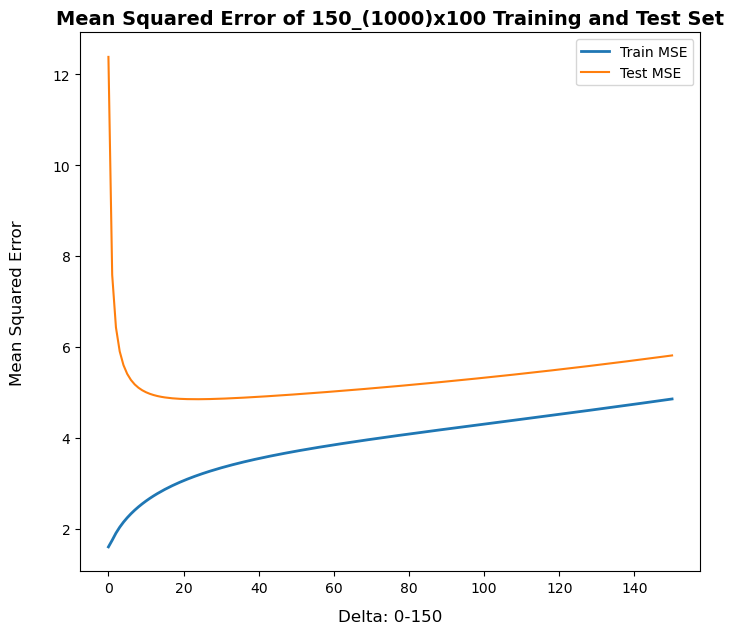

In [47]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of 150_(1000)x100 Training and Test Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(results_150_1000x100_df["Delta"], results_150_1000x100_df["Train Mean Squared Errors"], lw = 2)
plt.plot(results_150_1000x100_df["Delta"], results_150_1000x100_df["Test Mean Squared Errors"])
plt.legend(["Train MSE", "Test MSE"])
plt.show();

## The best λ value that gives the least test set MSE for each dataset is: 

In [48]:
index_min_test_error = results_50_1000x100_df["Test Mean Squared Errors"].idxmin() 
small_mse_50_1000x100 = results_50_1000x100_df.iloc[[index_min_test_error]][["Delta", "Test Mean Squared Errors"]]
small_mse_50_1000x100

,Delta,Test Mean Squared Errors
8,8,5.540902


In [49]:
index_min_test_error = results_100_1000x100_df["Test Mean Squared Errors"].idxmin() 
small_mse_100_1000x100 = results_100_1000x100_df.iloc[[index_min_test_error]][["Delta", "Test Mean Squared Errors"]]
small_mse_100_1000x100

,Delta,Test Mean Squared Errors
19,19,5.205912


In [50]:
index_min_test_error = results_150_1000x100_df["Test Mean Squared Errors"].idxmin() 
small_mse_150_1000x100 = results_150_1000x100_df.iloc[[index_min_test_error]][["Delta", "Test Mean Squared Errors"]]
small_mse_150_1000x100

,Delta,Test Mean Squared Errors
23,23,4.848943


In [51]:
smallest_mse_df = pd.concat([small_mse_100x10, small_mse_100x100, small_mse_1000x100, small_mse_50_1000x100, 
                             small_mse_100_1000x100, small_mse_150_1000x100])
smallest_mse_df

,Delta,Test Mean Squared Errors
8,8,4.159679
22,22,5.078300
27,27,4.315571
8,8,5.540902
19,19,5.205912
23,23,4.848943


In [52]:
smallest_mse_df["Datasets"] = ["100x10 Set", "100x100 Set", "1000x100 Set", "50_(1000)x100 Set",
                                 "100_(1000)x100 Set", "150_(1000)x100 Set"]
smallest_mse_df = smallest_mse_df.set_index(["Datasets"])
smallest_mse_df

,Delta,Test Mean Squared Errors
Datasets,,
100x10 Set,8,4.159679
100x100 Set,22,5.078300
1000x100 Set,27,4.315571
50_(1000)x100 Set,8,5.540902
100_(1000)x100 Set,19,5.205912
150_(1000)x100 Set,23,4.848943


### Question 2 (part c) answer 



### λ = 0 gives abnormally large MSEs for the three training datasets in question 2b because the training models have no regularization (penalty) being applied at λ = 0. The linear regression models are solely focused on minimizing the mean squared error, but there is no restriction being placed on the kind of weights the models can use to fit to the y-values in the data. Thus, the models are at the greatest risk of overfitting to the training data. They are extremely biased at λ = 0. This is especially the case when considering how these specific models are fitting their regression line to 50 or 100 or 150 datapoints, but then are being directly tested on 1000 new data points.  

## Problem 3:

## Cross Validation with K Folds = 10

### 100x10 Dataset

In [53]:
# First we need to find the fold size, which is "the Length of the output y vector divided by the number of folds"

k_folds = 10
fold_size = int(len(y_train_100_10_vector) / k_folds)

#Then we need to initialize a Mean Squared Error Sum: create an array of 151 zeros (for delta ranging from 0-150)
#Then, we will find the the MSE sum by taking the sum of all the MSE scores for each of the K folds, and then 
#finding the average of this to get the MSE for each of our choices for delta

mse_sum_100_10 = np.zeros(151) 

for i in range(k_folds):
    X_train_100_10_fold = np.concatenate((matrix_train_100_10[ : i * fold_size], 
                                          matrix_train_100_10[(i+1) * fold_size : ]), axis=0)
    Y_train_100_10_fold = np.concatenate((y_train_100_10_vector[ : i*fold_size], 
                                          y_train_100_10_vector[(i+1)*fold_size : ]), axis=0)
    X_test_100_10_fold = matrix_train_100_10[ i * fold_size : (i+1) * fold_size]
    Y_test_100_10_fold = y_train_100_10_vector[ i * fold_size : (i+1) * fold_size]
    
    weights_100_10_list = [weight_w(X_train_100_10_fold, Y_train_100_10_fold, delta) for delta in delta_list]
    
    mse_error_list = [mean_squared_error(X_test_100_10_fold, Y_test_100_10_fold, w) 
                                     for w in weights_100_10_list]
    mse_error_array = np.array(mse_error_list)    #convert the mse_list into an array to be able to perform vector operations
    mse_sum_100_10 += mse_error_array

#Finally, get the mse for each delta ranging from 0-150

mse_final_error = mse_sum_100_10 / k_folds
mse_final_error


array([4.73561987, 4.51803358, 4.39035864, 4.31034123, 4.25806395,
       4.22302761, 4.19924523, 4.18309652, 4.17228991, 4.16532058,
       4.16116999, 4.15913096, 4.1587018 , 4.15951979, 4.16131837,
       4.16389881, 4.16711097, 4.17084011, 4.17499757, 4.1795142 ,
       4.18433557, 4.18941841, 4.19472813, 4.20023677, 4.20592162,
       4.21176407, 4.21774875, 4.22386289, 4.23009579, 4.2364384 ,
       4.24288306, 4.24942316, 4.25605302, 4.26276767, 4.26956276,
       4.27643444, 4.28337927, 4.29039414, 4.29747626, 4.30462306,
       4.31183218, 4.31910143, 4.32642878, 4.33381232, 4.34125024,
       4.34874084, 4.35628248, 4.36387361, 4.37151274, 4.37919844,
       4.38692931, 4.394704  , 4.40252123, 4.41037971, 4.41827822,
       4.42621556, 4.43419055, 4.44220204, 4.45024892, 4.45833008,
       4.46644446, 4.47459099, 4.48276865, 4.49097642, 4.49921332,
       4.50747836, 4.51577059, 4.52408907, 4.53243288, 4.54080112,
       4.54919289, 4.55760733, 4.56604358, 4.5745008 , 4.58297

In [54]:
cv_100_10_df = pd.DataFrame({"Delta": delta_list, "Mean Squared Errors": mse_final_error})
cv_100_10_df

,Delta,Mean Squared Errors
0,0,4.735620
1,1,4.518034
2,2,4.390359
3,3,4.310341
4,4,4.258064
...,...,...
146,146,5.207802
147,147,5.216310
148,148,5.224808
149,149,5.233294


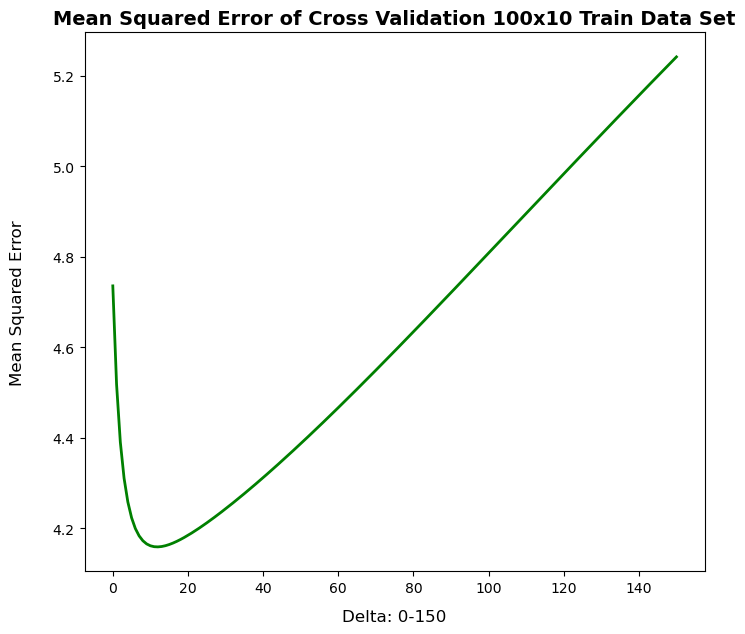

In [55]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of Cross Validation 100x10 Train Data Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(cv_100_10_df["Delta"], cv_100_10_df["Mean Squared Errors"], lw = 2, color = "green")
plt.show();

In [56]:
index_smallest_mse_error = cv_100_10_df["Mean Squared Errors"].idxmin() 
cv_small_100x10 = cv_100_10_df.iloc[[index_smallest_mse_error]]
cv_small_100x10

,Delta,Mean Squared Errors
12,12,4.158702


In [57]:
index_of_min_mse = mse_final_error.argmin()
index_of_min_mse

12

In [58]:
mse_final_error[index_of_min_mse]

4.158701799958344

### 100x100 Dataset

In [59]:
# First we need to find the fold size, which is "the Length of the output y vector divided by the number of folds"

k_folds = 10
fold_size = int(len(y_train_100_100_vector) / k_folds)

#Then we need to initialize a Mean Squared Error Sum: create an array of 151 zeros (for delta ranging from 0-150)
#Then, we will find the the MSE sum by taking the sum of all the MSE scores for each of the K folds, and then 
#finding the average of this to get the MSE for each of our choices for delta

mse_sum_100_100 = np.zeros(151) 

for i in range(k_folds):
    X_train_100_100_fold = np.concatenate((matrix_train_100_100[ : i * fold_size], 
                                          matrix_train_100_100[(i+1) * fold_size : ]), axis=0)
    Y_train_100_100_fold = np.concatenate((y_train_100_100_vector[ : i*fold_size], 
                                          y_train_100_100_vector[(i+1)*fold_size : ]), axis=0)
    X_test_100_100_fold = matrix_train_100_100[ i * fold_size : (i+1) * fold_size]
    Y_test_100_100_fold = y_train_100_100_vector[ i * fold_size : (i+1) * fold_size]
    
    weights_100_100_list = [weight_w(X_train_100_100_fold, Y_train_100_100_fold, delta) for delta in delta_list]
    
    mse_error_list = [mean_squared_error(X_test_100_100_fold, Y_test_100_100_fold, w) 
                                     for w in weights_100_100_list]
    mse_error_array = np.array(mse_error_list)  #convert the mse_list into an array to be able to perform vector operations
    mse_sum_100_100 += mse_error_array

#Finally, get the mse for each delta ranging from 0-150

mse_final_error = mse_sum_100_100 / k_folds
mse_final_error


array([5.94569100e+05, 5.87267912e+00, 5.29549979e+00, 5.04003989e+00,
       4.89100370e+00, 4.79243544e+00, 4.72245850e+00, 4.67051649e+00,
       4.63080387e+00, 4.59982820e+00, 4.57534642e+00, 4.55584429e+00,
       4.54025874e+00, 4.52781953e+00, 4.51795390e+00, 4.51022660e+00,
       4.50430075e+00, 4.49991142e+00, 4.49684737e+00, 4.49493815e+00,
       4.49404471e+00, 4.49405253e+00, 4.49486651e+00, 4.49640700e+00,
       4.49860687e+00, 4.50140912e+00, 4.50476512e+00, 4.50863308e+00,
       4.51297698e+00, 4.51776554e+00, 4.52297154e+00, 4.52857117e+00,
       4.53454349e+00, 4.54087008e+00, 4.54753459e+00, 4.55452256e+00,
       4.56182105e+00, 4.56941855e+00, 4.57730470e+00, 4.58547021e+00,
       4.59390670e+00, 4.60260659e+00, 4.61156301e+00, 4.62076973e+00,
       4.63022106e+00, 4.63991181e+00, 4.64983721e+00, 4.65999292e+00,
       4.67037492e+00, 4.68097951e+00, 4.69180327e+00, 4.70284304e+00,
       4.71409589e+00, 4.72555909e+00, 4.73723010e+00, 4.74910653e+00,
      

In [60]:
cv_100_100_df = pd.DataFrame({"Delta": delta_list, "Mean Squared Errors": mse_final_error})
cv_100_100_df

,Delta,Mean Squared Errors
0,0,594569.100431
1,1,5.872679
2,2,5.295500
3,3,5.040040
4,4,4.891004
...,...,...
146,146,6.553989
147,147,6.580925
148,148,6.608001
149,149,6.635218


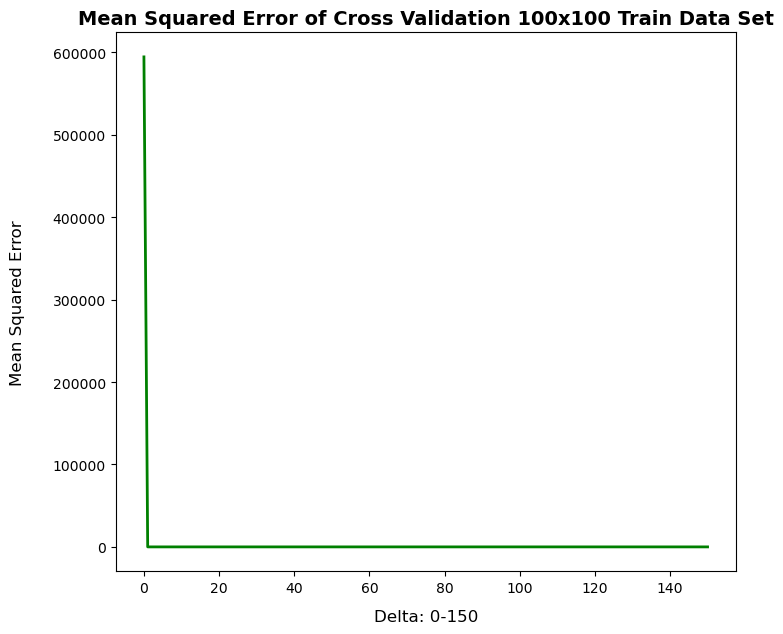

In [61]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of Cross Validation 100x100 Train Data Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(cv_100_100_df["Delta"], cv_100_100_df["Mean Squared Errors"], lw = 2, color = "green")
plt.show();

In [62]:
index_smallest_mse_error = cv_100_100_df["Mean Squared Errors"].idxmin() 
cv_small_100x100 = cv_100_100_df.iloc[[index_smallest_mse_error]]
cv_small_100x100

,Delta,Mean Squared Errors
20,20,4.494045


### 1000x100 Dataset

In [63]:
# First we need to find the fold size, which is "the Length of the output y vector divided by the number of folds"

k_folds = 10
fold_size = int(len(y_train_1000_100_vector) / k_folds)

#Then we need to initialize a Mean Squared Error Sum: create an array of 151 zeros (for delta ranging from 0-150)
#Then, we will find the the MSE sum by taking the sum of all the MSE scores for each of the K folds, and then 
#finding the average of this to get the MSE for each of our choices for delta

mse_sum_1000_100 = np.zeros(151) 

for i in range(k_folds):
    X_train_1000_100_fold = np.concatenate((matrix_train_1000_100[ : i * fold_size], 
                                          matrix_train_1000_100[(i+1) * fold_size : ]), axis=0)
    Y_train_1000_100_fold = np.concatenate((y_train_1000_100_vector[ : i*fold_size], 
                                          y_train_1000_100_vector[(i+1)*fold_size : ]), axis=0)
    X_test_1000_100_fold = matrix_train_1000_100[ i * fold_size : (i+1) * fold_size]
    Y_test_1000_100_fold = y_train_1000_100_vector[ i * fold_size : (i+1) * fold_size]
    
    weights_1000_100_list = [weight_w(X_train_1000_100_fold, Y_train_1000_100_fold, delta) for delta in delta_list]
    
    mse_error_list = [mean_squared_error(X_test_1000_100_fold, Y_test_1000_100_fold, w) 
                                     for w in weights_1000_100_list]
    mse_error_array = np.array(mse_error_list)
    mse_sum_1000_100 += mse_error_array

#Finally, get the mse for each delta ranging from 0-150

mse_final_error = mse_sum_1000_100 / k_folds
mse_final_error


array([4.3273546 , 4.31156992, 4.29699069, 4.28351787, 4.27106231,
       4.25954358, 4.24888895, 4.23903249, 4.22991434, 4.22148001,
       4.2136798 , 4.20646835, 4.19980411, 4.19364902, 4.18796816,
       4.18272939, 4.17790316, 4.17346219, 4.16938133, 4.16563731,
       4.16220863, 4.15907532, 4.15621892, 4.15362224, 4.15126935,
       4.14914538, 4.14723653, 4.14552991, 4.1440135 , 4.1426761 ,
       4.14150721, 4.14049705, 4.13963643, 4.13891677, 4.13833002,
       4.13786863, 4.13752552, 4.13729404, 4.13716794, 4.13714134,
       4.13720871, 4.13736487, 4.1376049 , 4.1379242 , 4.13831841,
       4.13878343, 4.1393154 , 4.13991064, 4.14056573, 4.14127739,
       4.14204254, 4.14285827, 4.14372183, 4.1446306 , 4.14558212,
       4.14657404, 4.14760416, 4.14867037, 4.14977069, 4.15090322,
       4.15206619, 4.1532579 , 4.15447673, 4.15572115, 4.15698973,
       4.15828107, 4.15959387, 4.16092688, 4.16227893, 4.1636489 ,
       4.16503571, 4.16643835, 4.16785586, 4.16928731, 4.17073

In [64]:
cv_1000_100_df = pd.DataFrame({"Delta": delta_list, "Mean Squared Errors": mse_final_error})
cv_1000_100_df

,Delta,Mean Squared Errors
0,0,4.327355
1,1,4.311570
2,2,4.296991
3,3,4.283518
4,4,4.271062
...,...,...
146,146,4.281885
147,147,4.283365
148,148,4.284842
149,149,4.286315


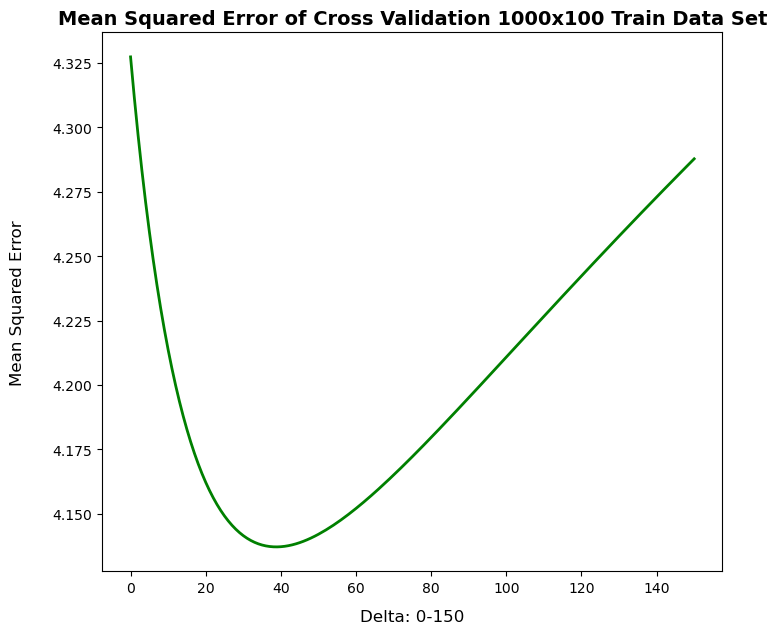

In [65]:
plt.figure(figsize = (8, 7))
plt.title("Mean Squared Error of Cross Validation 1000x100 Train Data Set", fontsize= 14.0, fontweight='bold')
plt.xlabel("Delta: 0-150", labelpad = 10, fontsize= 12.0)  
plt.ylabel("Mean Squared Error", labelpad = 20, fontsize= 12.0)
plt.plot(cv_1000_100_df["Delta"], cv_1000_100_df["Mean Squared Errors"], lw = 2, color = "green")
plt.show();

In [66]:
index_smallest_mse_error = cv_1000_100_df["Mean Squared Errors"].idxmin() 
cv_small_1000x100 = cv_1000_100_df.iloc[[index_smallest_mse_error]]
cv_small_1000x100

,Delta,Mean Squared Errors
39,39,4.137141


### (50)_1000x100 Dataset

In [67]:
# First we need to find the fold size, which is "the Length of the output y vector divided by the number of folds"

k_folds = 10
fold_size = int(len(y_train_50_1000x100_vector) / k_folds)

#Then we need to initialize a Mean Squared Error Sum: create an array of 151 zeros (for delta ranging from 0-150)
#Then, we will find the the MSE sum by taking the sum of all the MSE scores for each of the K folds, and then 
#finding the average of this to get the MSE for each of our choices for delta

mse_sum_50_1000x100 = np.zeros(151) 

for i in range(k_folds):
    X_train_50_1000x100_fold = np.concatenate((matrix_train_50_1000x100[ : i * fold_size], 
                                          matrix_train_50_1000x100[(i+1) * fold_size : ]), axis=0)
    Y_train_50_1000x100_fold = np.concatenate((y_train_50_1000x100_vector[ : i*fold_size], 
                                          y_train_50_1000x100_vector[(i+1)*fold_size : ]), axis=0)
    X_test_50_1000x100_fold = matrix_train_50_1000x100[ i * fold_size : (i+1) * fold_size]
    Y_test_50_1000x100_fold = y_train_50_1000x100_vector[ i * fold_size : (i+1) * fold_size]
    
    weights_50_1000x100_list = [weight_w(X_train_50_1000x100_fold, Y_train_50_1000x100_fold, delta) for delta in delta_list]
    
    mse_error_list = [mean_squared_error(X_test_50_1000x100_fold, Y_test_50_1000x100_fold, w) 
                                     for w in weights_50_1000x100_list]
    mse_error_array = np.array(mse_error_list)
    mse_sum_50_1000x100 += mse_error_array

#Finally, get the mse for each delta ranging from 0-150

mse_final_error = mse_sum_50_1000x100 / k_folds
mse_final_error


array([1.25972628e+09, 1.19156590e+01, 9.44530245e+00, 8.17960910e+00,
       7.41315977e+00, 6.90266309e+00, 6.54113533e+00, 6.27400336e+00,
       6.07047102e+00, 5.91183521e+00, 5.78608332e+00, 5.68515157e+00,
       5.60342973e+00, 5.53689724e+00, 5.48259986e+00, 5.43832008e+00,
       5.40236227e+00, 5.37340871e+00, 5.35042060e+00, 5.33256851e+00,
       5.31918257e+00, 5.30971610e+00, 5.30371881e+00, 5.30081652e+00,
       5.30069591e+00, 5.30309261e+00, 5.30778212e+00, 5.31457255e+00,
       5.32329891e+00, 5.33381857e+00, 5.34600759e+00, 5.35975773e+00,
       5.37497403e+00, 5.39157280e+00, 5.40947998e+00, 5.42862979e+00,
       5.44896353e+00, 5.47042868e+00, 5.49297804e+00, 5.51656908e+00,
       5.54116334e+00, 5.56672591e+00, 5.59322503e+00, 5.62063173e+00,
       5.64891947e+00, 5.67806392e+00, 5.70804265e+00, 5.73883499e+00,
       5.77042181e+00, 5.80278537e+00, 5.83590917e+00, 5.86977786e+00,
       5.90437707e+00, 5.93969336e+00, 5.97571414e+00, 6.01242755e+00,
      

In [68]:
cv_50_1000x100_df = pd.DataFrame({"Delta": delta_list, "Mean Squared Errors": mse_final_error})
cv_50_1000x100_df

,Delta,Mean Squared Errors
0,0,1.259726e+09
1,1,1.191566e+01
2,2,9.445302e+00
3,3,8.179609e+00
4,4,7.413160e+00
...,...,...
146,146,1.152180e+01
147,147,1.160141e+01
148,148,1.168136e+01
149,149,1.176165e+01


In [69]:
index_smallest_mse_error = cv_50_1000x100_df["Mean Squared Errors"].idxmin() 
cv_small_50_1000x100 = cv_50_1000x100_df.iloc[[index_smallest_mse_error]]
cv_small_50_1000x100

,Delta,Mean Squared Errors
24,24,5.300696


### (100)_1000x100 Dataset

In [70]:
# First we need to find the fold size, which is "the Length of the output y vector divided by the number of folds"

k_folds = 10
fold_size = int(len(y_train_100_1000x100_vector) / k_folds)

#Then we need to initialize a Mean Squared Error Sum: create an array of 151 zeros (for delta ranging from 0-150)
#Then, we will find the the MSE sum by taking the sum of all the MSE scores for each of the K folds, and then 
#finding the average of this to get the MSE for each of our choices for delta

mse_sum_100_1000x100 = np.zeros(151) 

for i in range(k_folds):
    X_train_100_1000x100_fold = np.concatenate((matrix_train_100_1000x100[ : i * fold_size], 
                                          matrix_train_100_1000x100[(i+1) * fold_size : ]), axis=0)
    Y_train_100_1000x100_fold = np.concatenate((y_train_100_1000x100_vector[ : i*fold_size], 
                                          y_train_100_1000x100_vector[(i+1)*fold_size : ]), axis=0)
    X_test_100_1000x100_fold = matrix_train_100_1000x100[ i * fold_size : (i+1) * fold_size]
    Y_test_100_1000x100_fold = y_train_100_1000x100_vector[ i * fold_size : (i+1) * fold_size]
    
    weights_100_1000x100_list = [weight_w(X_train_100_1000x100_fold, Y_train_100_1000x100_fold, delta) for delta in delta_list]
    
    mse_error_list = [mean_squared_error(X_test_100_1000x100_fold, Y_test_100_1000x100_fold, w) 
                                     for w in weights_100_1000x100_list]
    mse_error_array = np.array(mse_error_list)
    mse_sum_100_1000x100 += mse_error_array

#Finally, get the mse for each delta ranging from 0-150

mse_final_error = mse_sum_100_1000x100 / k_folds
mse_final_error


array([6.14310383e+05, 9.87340124e+00, 7.66802547e+00, 6.73742811e+00,
       6.22145315e+00, 5.89402232e+00, 5.66856739e+00, 5.50459205e+00,
       5.38057154e+00, 5.28399402e+00, 5.20708638e+00, 5.14476411e+00,
       5.09356156e+00, 5.05103558e+00, 5.01541477e+00, 4.98538383e+00,
       4.95994602e+00, 4.93833245e+00, 4.91994074e+00, 4.90429244e+00,
       4.89100284e+00, 4.87975919e+00, 4.87030477e+00, 4.86242687e+00,
       4.85594789e+00, 4.85071837e+00, 4.84661168e+00, 4.84351987e+00,
       4.84135035e+00, 4.84002328e+00, 4.83946945e+00, 4.83962862e+00,
       4.84044806e+00, 4.84188148e+00, 4.84388804e+00, 4.84643160e+00,
       4.84948005e+00, 4.85300477e+00, 4.85698019e+00, 4.86138335e+00,
       4.86619361e+00, 4.87139236e+00, 4.87696276e+00, 4.88288956e+00,
       4.88915888e+00, 4.89575807e+00, 4.90267562e+00, 4.90990094e+00,
       4.91742437e+00, 4.92523700e+00, 4.93333065e+00, 4.94169774e+00,
       4.95033131e+00, 4.95922488e+00, 4.96837246e+00, 4.97776845e+00,
      

In [71]:
cv_100_1000x100_df = pd.DataFrame({"Delta": delta_list, "Mean Squared Errors": mse_final_error})
cv_100_1000x100_df

,Delta,Mean Squared Errors
0,0,614310.383161
1,1,9.873401
2,2,7.668025
3,3,6.737428
4,4,6.221453
...,...,...
146,146,6.592079
147,147,6.616759
148,148,6.641572
149,149,6.666518


In [72]:
index_smallest_mse_error = cv_100_1000x100_df["Mean Squared Errors"].idxmin() 
cv_small_100_1000x100 = cv_100_1000x100_df.iloc[[index_smallest_mse_error]]
cv_small_100_1000x100

,Delta,Mean Squared Errors
30,30,4.839469


### (150)_1000x100 Dataset

In [73]:
# First we need to find the fold size, which is "the Length of the output y vector divided by the number of folds"

k_folds = 10
fold_size = int(len(y_train_150_1000x100_vector) / k_folds)

#Then we need to initialize a Mean Squared Error Sum: create an array of 151 zeros (for delta ranging from 0-150)
#Then, we will find the the MSE sum by taking the sum of all the MSE scores for each of the K folds, and then 
#finding the average of this to get the MSE for each of our choices for delta

mse_sum_150_1000x100 = np.zeros(151) 

for i in range(k_folds):
    X_train_150_1000x100_fold = np.concatenate((matrix_train_150_1000x100[ : i * fold_size], 
                                          matrix_train_150_1000x100[(i+1) * fold_size : ]), axis=0)
    Y_train_150_1000x100_fold = np.concatenate((y_train_150_1000x100_vector[ : i*fold_size], 
                                          y_train_150_1000x100_vector[(i+1)*fold_size : ]), axis=0)
    X_test_150_1000x100_fold = matrix_train_150_1000x100[ i * fold_size : (i+1) * fold_size]
    Y_test_150_1000x100_fold = y_train_150_1000x100_vector[ i * fold_size : (i+1) * fold_size]
    
    weights_150_1000x100_list = [weight_w(X_train_150_1000x100_fold, Y_train_150_1000x100_fold, delta) for delta in delta_list]
    
    mse_error_list = [mean_squared_error(X_test_150_1000x100_fold, Y_test_150_1000x100_fold, w) 
                                     for w in weights_150_1000x100_list]
    mse_error_array = np.array(mse_error_list)
    mse_sum_150_1000x100 += mse_error_array

#Finally, get the mse for each delta ranging from 0-150

mse_final_error = mse_sum_150_1000x100 / k_folds
mse_final_error


array([16.66692912,  9.02547709,  7.57386005,  6.86909003,  6.43908563,
        6.1458025 ,  5.93187144,  5.7685896 ,  5.63981235,  5.5356898 ,
        5.44984106,  5.37793686,  5.31692979,  5.26460919,  5.21933071,
        5.17984491,  5.14518495,  5.11459064,  5.0874559 ,  5.06329147,
        5.04169802,  5.02234637,  5.00496272,  4.98931745,  4.97521658,
        4.9624951 ,  4.95101175,  4.94064491,  4.9312893 ,  4.92285334,
        4.91525697,  4.90842991,  4.90231022,  4.89684309,  4.89197984,
        4.8876771 ,  4.8838961 ,  4.88060207,  4.87776375,  4.87535296,
        4.8733442 ,  4.87171439,  4.87044253,  4.86950954,  4.86889797,
        4.8685919 ,  4.86857672,  4.86883903,  4.8693665 ,  4.87014779,
        4.87117242,  4.8724307 ,  4.87391368,  4.87561305,  4.8775211 ,
        4.87963065,  4.88193503,  4.884428  ,  4.88710377,  4.8899569 ,
        4.89298231,  4.89617524,  4.89953122,  4.90304606,  4.90671582,
        4.91053679,  4.91450548,  4.91861859,  4.92287302,  4.92

In [74]:
cv_150_1000x100_df = pd.DataFrame({"Delta": delta_list, "Mean Squared Errors": mse_final_error})
cv_150_1000x100_df

,Delta,Mean Squared Errors
0,0,16.666929
1,1,9.025477
2,2,7.573860
3,3,6.869090
4,4,6.439086
...,...,...
146,146,5.570668
147,147,5.582268
148,148,5.593942
149,149,5.605688


In [75]:
index_smallest_mse_error = cv_150_1000x100_df["Mean Squared Errors"].idxmin() 
cv_small_150_1000x100 = cv_150_1000x100_df.iloc[[index_smallest_mse_error]]
cv_small_150_1000x100

,Delta,Mean Squared Errors
46,46,4.868577


## Best Choice for Lambda for Cross Validation

In [76]:
cv_smallest_mse_df = pd.concat([cv_small_100x10, cv_small_100x100, cv_small_1000x100, cv_small_50_1000x100, 
                                cv_small_100_1000x100, cv_small_150_1000x100])
cv_smallest_mse_df

,Delta,Mean Squared Errors
12,12,4.158702
20,20,4.494045
39,39,4.137141
24,24,5.300696
30,30,4.839469
46,46,4.868577


In [79]:
cv_smallest_mse_df["Datasets"] = ["100x10 Set", "100x100 Set", "1000x100 Set", "(50)_1000x100 Set",
                                 "(100)_1000x100 Set", "(150)_1000x100 Set"]
cv_smallest_mse_df = cv_smallest_mse_df.set_index(["Datasets"])
cv_smallest_mse_df

,Delta,Mean Squared Errors
Datasets,,
100x10 Set,12,4.158702
100x100 Set,20,4.494045
1000x100 Set,39,4.137141
(50)_1000x100 Set,24,5.300696
(100)_1000x100 Set,30,4.839469
(150)_1000x100 Set,46,4.868577


### Those Mean Square Errors above are the MSE from the corresponding Cross Validation. This is NOT the MSE for the best lambda values on the ENTIRE test sets

## Reminder: In my project, I called lambda as "delta". Because python already has a built in key word lambda. So instead I used the word delta for this symbol: λ 

## Let's now get the test set MSE's now for each of these lambda values

In [94]:
mse_cv_test_list = []

## **100x10 Test MSE for lambda=12**

In [80]:
cv_smallest_mse_df.iloc[0,0]

12

In [95]:
w = weight_w(matrix_train_100_10, y_train_100_10_vector, cv_smallest_mse_df.iloc[0,0])
mse_1 = mean_squared_error(matrix_test_100_10, y_test_100x10_vector, w)
mse_cv_test_list.append(mse_1)
mse_1

4.175709159671145

## **100x100 Test MSE for lambda=20**

In [82]:
cv_smallest_mse_df.iloc[1,0]

20

In [96]:
w = weight_w(matrix_train_100_100, y_train_100_100_vector, cv_smallest_mse_df.iloc[1,0])
mse_2 = mean_squared_error(matrix_test_100_100, y_test_100_100_vector, w)
mse_cv_test_list.append(mse_2)
mse_2

5.080888818068284

## **1000x100 Test MSE for lambda=39**

In [84]:
cv_smallest_mse_df.iloc[2,0]

39

In [97]:
w = weight_w(matrix_train_1000_100, y_train_1000_100_vector, cv_smallest_mse_df.iloc[2,0])
mse_3 = mean_squared_error(matrix_test_1000_100, y_test_1000_100_vector, w)
mse_cv_test_list.append(mse_3)
mse_3 

4.322722350843265

## **(50)_1000x100 Test MSE for lambda=24**

In [86]:
cv_smallest_mse_df.iloc[3,0]

24

In [98]:
w = weight_w(matrix_train_50_1000x100, y_train_50_1000x100_vector, cv_smallest_mse_df.iloc[3,0])
mse_4 = mean_squared_error(matrix_test_1000_100, y_test_1000_100_vector, w)
mse_cv_test_list.append(mse_4)
mse_4 

5.934465384321145

## **(100)_1000x100 Test MSE for lambda=30**

In [89]:
cv_smallest_mse_df.iloc[4,0]

30

In [99]:
w = weight_w(matrix_train_100_1000x100, y_train_100_1000x100_vector, cv_smallest_mse_df.iloc[4,0])
mse_5 = mean_squared_error(matrix_test_1000_100, y_test_1000_100_vector, w)
mse_cv_test_list.append(mse_5)
mse_5 

5.259982741331548

## **(150)_1000x100 Test MSE for lambda=46**

In [91]:
cv_smallest_mse_df.iloc[5,0]

46

In [100]:
w = weight_w(matrix_train_150_1000x100, y_train_150_1000x100_vector, cv_smallest_mse_df.iloc[5,0])
mse_6 = mean_squared_error(matrix_test_1000_100, y_test_1000_100_vector, w)
mse_cv_test_list.append(mse_6)
mse_6 

4.934192607704017

In [101]:
final_mse_cv_df = pd.DataFrame({"Delta": cv_smallest_mse_df["Delta"], "Mean Squared Errors": mse_cv_test_list})
final_mse_cv_df

,Delta,Mean Squared Errors
Datasets,,
100x10 Set,12,4.175709
100x100 Set,20,5.080889
1000x100 Set,39,4.322722
(50)_1000x100 Set,24,5.934465
(100)_1000x100 Set,30,5.259983
(150)_1000x100 Set,46,4.934193


In [102]:
final_mse_cv_df["Datasets"] = ["100x10 Set", "100x100 Set", "1000x100 Set", "(50)_1000x100 Set",
                                 "(100)_1000x100 Set", "(150)_1000x100 Set"]
final_mse_cv_df = final_mse_cv_df.set_index(["Datasets"])
final_mse_cv_df

,Delta,Mean Squared Errors
Datasets,,
100x10 Set,12,4.175709
100x100 Set,20,5.080889
1000x100 Set,39,4.322722
(50)_1000x100 Set,24,5.934465
(100)_1000x100 Set,30,5.259983
(150)_1000x100 Set,46,4.934193
